In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import style
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
import tushare as ts
fin_datas = ts.get_hist_data('600905', start='2021-10-11', end='2021-12-31')
fin_datas = fin_datas.reset_index()
fin_datas = fin_datas.sort_values('date',ascending=True)
fin_datas = fin_datas.reset_index()
fin_datas = fin_datas.drop(['index', 'date'], axis = 1)
fin_datas

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
0,7.22,7.25,6.84,6.70,6123323.00,-0.30,-4.20,7.174,7.072,6.669,8534272.30,11166295.25,9889276.25,8.81
1,6.70,6.94,6.73,6.45,6047445.00,-0.11,-1.61,7.028,7.083,6.680,7171635.30,10201793.65,9285817.60,8.70
2,6.64,6.64,6.49,6.36,4431096.50,-0.24,-3.57,6.914,7.004,6.686,6291281.80,9061489.70,8883987.98,6.38
3,6.41,6.69,6.53,6.33,4498129.00,0.04,0.62,6.746,6.961,6.685,5460974.00,7970881.50,8573383.63,6.47
4,6.48,6.75,6.68,6.43,4146097.75,0.15,2.30,6.654,6.918,6.692,5049218.25,7173611.78,8191554.66,5.97
5,6.74,7.18,7.00,6.66,6603610.00,0.32,4.79,6.686,6.930,6.730,5145275.65,6839773.98,8120497.24,9.50
6,6.97,7.03,6.90,6.86,4109099.25,-0.10,-1.43,6.720,6.874,6.769,4757606.50,5964620.90,8015600.30,5.91
7,6.85,7.20,7.10,6.82,6746849.50,0.20,2.90,6.842,6.878,6.816,5220757.10,5756019.45,8083355.98,9.71
8,7.05,7.05,6.88,6.82,5297956.50,-0.22,-3.10,6.912,6.829,6.861,5380722.60,5420848.30,8123180.45,7.62
9,6.86,6.87,6.63,6.62,3813186.25,-0.25,-3.63,6.902,6.778,6.884,5314140.30,5181679.28,8054865.41,5.49


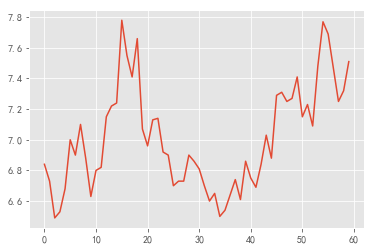

In [3]:
seq = fin_datas['close'].tolist()
seqs = pd.DataFrame(seq)
seqs.columns = ['seq']
style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(seqs)
plt.show()

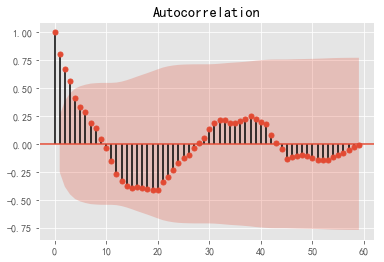

In [4]:
plot_acf(seqs).show()

In [5]:
print(u'原始序列的ADF结果：',ADF(seqs['seq']))

原始序列的ADF结果： (-2.1183304287046703, 0.23720800813212944, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, -17.241692105517544)


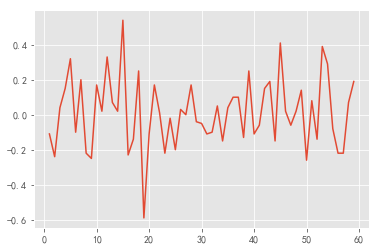

In [6]:
seqs_d = seqs.diff().dropna()
seqs_d.columns=['seq_d']
plt.plot(seqs_d)
plt.show()

差分序列的ADF结果： (-8.459543849131947, 1.5809488951519005e-13, 0, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, -15.69762738623919)
差分序列的白噪声检验结果： (array([0.95713169]), array([0.32791061]))


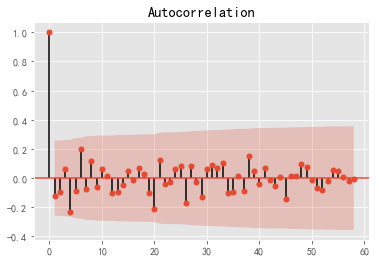

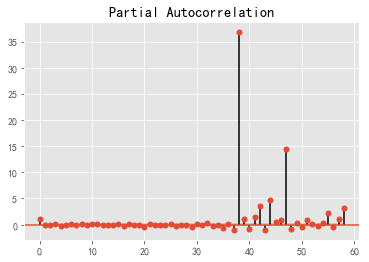

In [7]:
plot_acf(seqs_d).show()
plot_pacf(seqs_d).show()
print(u'差分序列的ADF结果：',ADF(seqs_d['seq_d']))
print(u'差分序列的白噪声检验结果：', acorr_ljungbox(seqs_d, lags=1))

In [8]:
seqs['seq'] = seqs['seq'].astype(float)
pmax = int(len(seqs_d) / 10)
qmax = int(len(seqs_d) / 10)
bic_matrix = []
for p in range(pmax + 1):
    tmp = []
    for q in range(qmax + 1):
        try:
            tmp.append(ARIMA(seqs, (p, 1, q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

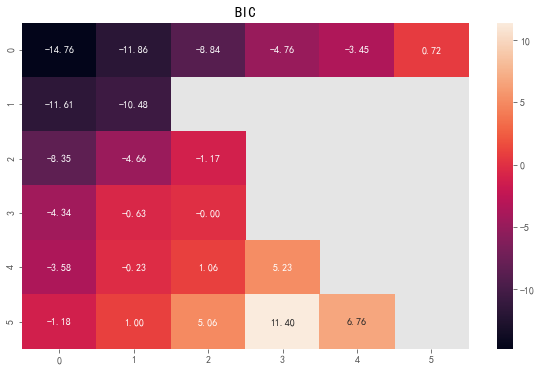

BIC最小的p值和q值：0,0


In [9]:
bic_matrix = pd.DataFrame(bic_matrix)
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(bic_matrix, mask = bic_matrix.isnull(), ax = ax, annot = True, fmt = '.2f')
ax.set_title('BIC')
plt.show()
p,q = bic_matrix.stack().idxmin()
print(u'BIC最小的p值和q值：%s,%s'%(p,q))

In [10]:
forecastnum = 5
model = ARIMA(seqs, (p,1,q)).fit()
summary = model.summary()
forecast = model.forecast(forecastnum)
print(summary)
print(forecast)

                             ARIMA Model Results                              
Dep. Variable:                  D.seq   No. Observations:                   59
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  11.459
Method:                           css   S.D. of innovations              0.199
Date:                Fri, 22 Apr 2022   AIC                            -18.918
Time:                        00:12:42   BIC                            -14.763
Sample:                             1   HQIC                           -17.296
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0114      0.026      0.438      0.663      -0.039       0.062
(array([7.52135593, 7.53271186, 7.5440678 , 7.55542373, 7.56677966]), array([0.19925673, 0.28179158, 0.34512279, 0.39851347, 0.4455

In [11]:
pred = [7.52135593, 7.53271186, 7.5440678 , 7.55542373, 7.56677966]
new_seq = pd.DataFrame(pred)
new_seq.columns = ['seq']
seqs = seqs.append(new_seq)
seqs = seqs.reset_index()
seqs = seqs.drop(['index'], axis = 1)
seqs.tail()

,seq
60,7.521356
61,7.532712
62,7.544068
63,7.555424
64,7.566780


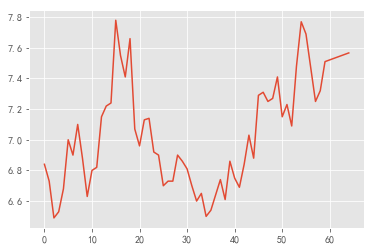

In [12]:
style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(seqs)
plt.show()

In [13]:
MA10 = []
MA5 = []
for day in range(len(seqs['seq'])):
    if day < 4:
        MA5.append(0)
        MA10.append(0)
    elif day < 9:
        MA5.append(seqs.loc[day - 4:day + 1].mean().values[0])
        MA10.append(0)
    else:
        MA5.append(seqs.loc[day - 4:day + 1].mean().values[0])
        MA10.append(seqs.loc[day - 9:day + 1].mean().values[0])
MA = pd.DataFrame()
MA['MA5'] = MA5
MA['MA10'] = MA10
MA.tail()

,MA5,MA10
60,7.434011,7.442188
61,7.446356,7.470740
62,7.497260,7.513051
63,7.538390,7.520940
64,7.544068,7.496034


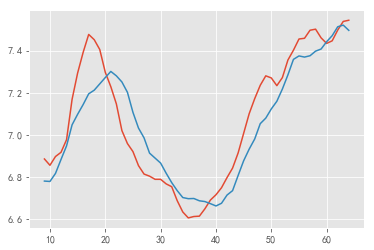

In [14]:
plt.plot(MA.loc[9:])
plt.show()

In [15]:
flag = MA['MA5'] - MA['MA10']
flag = flag.apply(lambda x: 1 if x >= 0 else 0)

fork_gold = []
fork_dead = []
last = flag[10]
for day in range(11, len(flag)):
    if flag[day] != last:
        if flag[day] == 0:
            fork_dead.append(day)
        else:
            fork_gold.append(day)
        last = flag[day]
print('金叉点: ', fork_gold)
print('死叉点: ', fork_dead)

金叉点:  [39, 63]
死叉点:  [21, 60]


In [16]:
fin_datas = ts.get_hist_data('600905', start='2021-10-11', end='2022-01-10')
fin_datas = fin_datas.reset_index()
fin_datas = fin_datas.sort_values('date',ascending=True)
fin_datas = fin_datas.reset_index()
fin_datas = fin_datas.drop(['index', 'date'], axis = 1)
fin_datas

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
0,7.22,7.25,6.84,6.70,6123323.00,-0.30,-4.20,7.174,7.072,6.669,8534272.30,11166295.25,9889276.25,8.81
1,6.70,6.94,6.73,6.45,6047445.00,-0.11,-1.61,7.028,7.083,6.680,7171635.30,10201793.65,9285817.60,8.70
2,6.64,6.64,6.49,6.36,4431096.50,-0.24,-3.57,6.914,7.004,6.686,6291281.80,9061489.70,8883987.98,6.38
3,6.41,6.69,6.53,6.33,4498129.00,0.04,0.62,6.746,6.961,6.685,5460974.00,7970881.50,8573383.63,6.47
4,6.48,6.75,6.68,6.43,4146097.75,0.15,2.30,6.654,6.918,6.692,5049218.25,7173611.78,8191554.66,5.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,7.57,7.69,7.43,7.41,4034471.25,-0.08,-1.06,7.396,7.424,7.268,4577986.80,5541350.35,6329391.93,4.71
61,7.41,7.43,7.20,7.11,4646892.00,-0.23,-3.10,7.342,7.421,7.294,4525999.40,5692952.45,6404435.46,5.42
62,7.12,7.25,7.19,7.09,3178437.00,-0.01,-0.14,7.330,7.431,7.311,4199822.30,5631528.85,6378340.33,3.71
63,7.16,7.21,7.10,7.09,3227437.75,-0.09,-1.25,7.286,7.393,7.315,4072997.80,5072708.83,6231469.99,3.77


In [17]:
price = fin_datas['close'].tolist()
earn = price[fork_dead[-1]] - price[fork_gold[0]]
print('对比每股收益: ', earn)

对比每股收益:  0.5699999999999994
